# Exact Ising Model simulation

## How to simulate time evolution at zero time
---

### Contributors:
Alba Cervera-Lierta from *QUANTIC group* at Barcelona Supercomputing Center (BSC).

### *Abstract*

*In this notebook, we will simulate exactly the magnetization and the time evolution of a $n=4$ spin chain with Ising-type interaction by constructing a quantum circuit that diagonalizes its dynamics. This circuit can be implemented in a real device using only five 2-qubit gates which, in terms of the available gate set, correspond to 12 CNOT gates and 22 one-qubit gates.*

*Note: this notebook was runned on 03/24/2018 at 3:45 p.m. (CET)*

## Introduction

One of the challenges in the field of quantum information is solving strongly-correlated many-body systems. The identification of the entanglement structure as well as the time and temperature evolution of some observables have direct applications in many fields such as condensed matter physics or quantum chemistry. 

Direct approaches of these systems are usually intractable due to the strong correlations between particles or the exponential growing of the complexity as more particles are taking into account. On the other hand, a huge variety of analytical and numerical techniques have been proposed in the last century; for instance, Tensor Networks [[1](https://arxiv.org/abs/1306.2164)] is one of the most used in the last years due to the variety of applications. But, although could be very accurate, are still approximations to the quantum states of the systems studied.

However, sometimes we are lucky and there exist a technique that allows us to solve some models _exactly_; these are the so-called _exactly-solvable models_ and most of them have a long tradition in statistical mechanics. Some examples are the 1-_d_ and 2-_d_ Ising Model, _XY_ model and the Bethe ansatz to solve Heisenberg-type models.

As there exist an analytic method to diagonalize and, therefore, solve these models, what if we can construct a quantum circuit that implement these methods and _disentangle_ certain kind of hamiltonians? This idea was proposed by Vestraete, Cirac and Latorre [[2](https://arxiv.org/abs/0804.1888)]: they designed a circuit that disentangles the _XY_ hamiltonian. As a consequence, one have access not only to the ground state of the system, but also to all its spectrum: this is fundamental to understand and study all properties of the model, including time and temperature evolution. 

With the emergence of quantum computers such as IBMQ, the real implementation of these circuits become possible. In this notebook, the most simple circuit will be programmed and implemented: a $n=4$ transverse Ising spin chain. We will compute the magnetization of the ground state and the time evolution (at zero time!) of some spin state.

## The transverse Ising model

One of the most simple models to describe an interacting spin chain is the transverse Ising model, which is a particular case of the $XY$ model. It describes an spin-1/2 chain with nearest-neightbour interaction with an external magnetic field. The hamiltonian of this model is usually written as

$$H=\sum_{i=1}^{n}\sigma^{x}_{i}\sigma^{x}_{i+1} + \lambda\sum_{i=1}^{n}\sigma^{z}_{i},$$

where $\lambda$ is the strength of the external magnetic field, and $\sigma$ are the Pauli matrices

$$\sigma^{x}=\left(\begin{array}{cc}0&1\\1&0\end{array}\right),\qquad \sigma^{y}=\left(\begin{array}{cc}0&-i\\i&0\end{array}\right),\qquad \sigma^z{}=\left(\begin{array}{cc}1&0\\0&-1\end{array}\right).$$

This model shows a quantum phase transition at some critical point $\lambda=\lambda_{c}$: for $\lambda<\lambda_{c}$ the spins are in a disordered paramagnetic phase (spins desire to be antiparalel $\uparrow\downarrow\uparrow\downarrow\cdots$) and for $\lambda>\lambda_{c}$ the spins are in an ordered ferromagnetic phase (spins desire to be in the same direction, $\uparrow\uparrow\uparrow\uparrow\cdots$ or $\downarrow\downarrow\downarrow\downarrow\cdots$). For infinite chains, $\lambda_{c}=1$. For finite chains with periodic boundary conditions, i.e. spin $n$ interacts with spin 1, the critical point is lesser than 1, but approaches to the value of infinite chain as $n$ increases. The same happens with the entropy: the bipartite entropy peaks around critical point, which moves to $\lambda=1$ as the size of the chain increases and scales logarithmically following the conformal scaling law $S\sim \frac{c}{6}\log n$ with central charge $c=1/2$ [[3](https://arxiv.org/abs/0906.1499)].


### Magnetization

One natural measure to observe the quantum phase transition is the magnetization, which corresponds to the expected value of the spin operator 

$$\langle S_{i}\rangle = \frac{\hbar}{2}\langle\sigma_{i}\rangle $$

As in our model the magnetic field is applied in the $z$ direction, we will measure the transverse magnetization, i.e. $M\propto\langle\sigma_{z}\rangle$ (moreover, we will take natural units and set $\hbar=1$).

The eigenvectors of $\sigma_{z}$ operator are 

$$\begin{eqnarray}\sigma_{z}|\uparrow\rangle &=& +1|\uparrow\rangle, \qquad \sigma_{z}|\downarrow\rangle &=& -1|\downarrow\rangle \end{eqnarray},$$

and we will identify them with the computational basis:

$$\begin{eqnarray}|0\rangle&\equiv&|\uparrow\rangle=\left(\begin{array}{c}1\\0\end{array}\right), \qquad
|1\rangle&\equiv&|\downarrow\rangle=\left(\begin{array}{c}0\\1\end{array}\right) \end{eqnarray}.$$

What should we expect from the magnetization as $\lambda$ increases? Let's set $\lambda=0$: all spins interact with their first neighbors according the above hamiltonian, i.e. in the $x$ direction, which is orthonormal to the $z$ direction. Following the above convention for the computational basis, the eigenstates of $\sigma_{x}$ are

$$\begin{array}{l l}
\sigma_{x}|\rightarrow\rangle=+1|\rightarrow\rangle, & |\rightarrow\rangle=\frac{1}{\sqrt{2}}\left(|\uparrow\rangle+|\downarrow\rangle\right)=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right), \\
\sigma_{x}|\leftarrow\rangle=-1|\leftarrow\rangle, & |\leftarrow\rangle=\frac{1}{\sqrt{2}}\left(-|\uparrow\rangle+|\downarrow\rangle\right)=\frac{1}{\sqrt{2}}\left(-|0\rangle+|1\rangle\right).
\end{array}$$

Then, for no external magnetic field, the spins point in the $x$ direction ($\rightarrow\rightarrow\rightarrow\cdots$ or $\leftarrow\leftarrow\leftarrow\cdots$) and as the magnetization is the expected value of $\sigma_{z}$ (the mean value of +1 spin states and -1 spin states), it is essentially zero. But when $\lambda$ appears, it introduces a direction in the orientation of spins, and they start flipping in order to align with the external field. This phenomena increase the magnetization until all spins are aligned: as many spins are considered, the transition is more abrupt.

At the end, computing the magnetization is computing the expected value of $\sigma_{z}$, _i.e._ $\langle\sigma_{z}\rangle=\langle\psi|\sigma_{z}|\psi\rangle$. As we have assigned $+1$ the magnetization of $|0\rangle$ state and $-1$ the magnetization of the $|1\rangle$ state, for a $N$ spin state

$$ \langle\sigma_{z}\rangle = \frac{1}{N}\sum_{i=1}^{2^N}p_{i}\langle e_{i}|\sigma_{z}|e_{i}\rangle=\frac{1}{N}\sum_{i=1}^{2^N}p_{i}(n^{0}_{i}-n^{1}_{i})=\frac{1}{N}\sum_{i=1}^{2^N}p_{i}(N-2n^{1}_{i}), $$

where $n_{i}^{0}(n_{i}^{1})$ are the number of zeros(ones) in the computational basis state $|e_{i}\rangle$ with probability $p_{i}$  $(|e_{i}\rangle=|0\cdots00\rangle,|0\cdots01\rangle,|0\cdots10\rangle,...,|1\cdots11\rangle)$. Then, it will be useful to define a subroutine to count the number of ones:

In [1]:
def digit_sum(n):
    num_str = str(n)
    sum = 0
    for i in range(0, len(num_str)):
        sum += int(num_str[i])
    return sum

## Exact solution for  transverse Ising model

The exact solution of Ising model (and its generalization, the $XY$ model) was found by Lieb, Schultz and Mattis in 1961 [[4](https://www.sciencedirect.com/science/article/pii/0003491661901154)] and later, the solution for the transverse Ising model, i.e. with the introduction of external magnetic field, by Katsura in 1962 [[5](https://journals.aps.org/pr/abstract/10.1103/PhysRev.127.1508)]. The method contains 3 steps:

1) Jordan-Wigner Transformation <br>
2) Fourier Transform  <br>
3) Bogoliubov Transformation  <br>

We will summarize how to implement these steps to finally obtain a unitary transformation that disentangles the Ising hamiltonian, i.e. diagonalize the hamiltonian.

### Finite size chain

The recipe of the exact solution for the transverse Ising model that we will introduce will solve the model as it was an infinite chain with periodic boundary conditions. As this will not be true when we will design the circuit (we work with a finite number of qubits), we should introduce an extra term in order to correctly map the periodic boundary conditions between spins to fermionic degrees of freedom after doing the Jordan-Wigner transformation. This term will be suppressed in the large $n$ limit, but will introduce some finite size effects in our result, as we will only consider 4 spins. Taking this into account, the transverse Ising hamiltonian reads

$$H=\sum_{i=1}^{n}\sigma^{x}_{i}\sigma^{x}_{i+1} + \lambda\sum_{i=1}^{n}\sigma^{z}_{i} + \sigma_{1}^{y}\sigma_{2}^{z}\cdots\sigma_{n-1}^{z}\sigma_{n}^{y},$$

### Jordan-Wigner Transformation

This transformation maps the spin operators into fermionic modes. It is defined as

$$
c_{j}=\left(\prod_{l<j}\sigma_{l}^{z}\right)\frac{\sigma_{j}^{x}-i\sigma_{j}^{y}}{2}, \qquad
c_{j}^\dagger=\left(\prod_{l<j}\sigma_{l}^{z}\right)\frac{\sigma_{j}^{x}+i\sigma_{j}^{y}}{2},
$$

where $c_{j}^\dagger$ and $c_{j}$ are the fermionic creation and annihilation operators acting on the vacuum state $|\Omega_{c}\rangle$ and satisfy

$$ \{c_{i},c_{j}\}=0, \qquad \{c_{i},c_{j}^\dagger\}=\delta_{ij}, \qquad c_{i}|\Omega_{c}\rangle=0.$$

Then, the hamiltonian become

$$ H_{c}=\frac{1}{2}\sum_{i=1}^{n}\left(c_{i+1}^{\dagger}c_{i}+c_{i}^{\dagger}c_{i+1}+c_{i}^{\dagger}c_{i+1}^{\dagger}+c_{i}c_{i+1}\right)+\lambda\sum_{i=1}^{n}c_{i}^{\dagger}c_{i}.$$

Thus, this transformation takes a state of spin-1/2 particles and turns it into a fermionic state. In terms of the wave function

$$ |\Psi\rangle=\sum_{i_{1},i_{2},\cdots,i_{n}=0,1}\psi_{i_{1},i_{2},\cdots,i_{n}}|i_{1},i_{2},\cdots,i_{n}\rangle \xrightarrow{J.W.} |\Psi\rangle_{c}=\sum_{i_{1},i_{2},\cdots,i_{n}=0,1}\psi_{i_{1},i_{2},\cdots,i_{n}}(c_{1}^\dagger)^{i_1}(c_{2}^\dagger)^{i_2}\cdots(c_{n}^\dagger)^{i_n}|\Omega_{c}\rangle.$$

Notice that the coefficients $\psi_{i_{1},i_{2},\cdots,i_{n}}$ do not change! Then, we will not need to implement any gates over our register to do this step. This is a huge simplification. The only thing we should take care is that any further swap will carry a minus sign if it is implemented between two occupied modes, following the rules of the anticommutation relations written above. To be more specific, any crossed line in our circuit, if needed, should be implemented with a fermionic SWAP gate:

$$ fSWAP=\left(\begin{array}{cccc}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&-1\end{array}\right). $$

<img src="fswap.png" width="700">

In [2]:
# CZ (Controlled-Z)
# control qubit: q0
# target qubit: q1
def CZ(qp,q0,q1):
    qp.h(q1)
    qp.cx(q0,q1)
    qp.h(q1)
# f-SWAP
# taking into account the one-directionality of CNOT gates in the available devices
def fSWAP(qp,q0,q1):
    qp.cx(q0,q1)
    qp.h(q0)
    qp.h(q1)
    qp.cx(q0,q1)
    qp.h(q0)
    qp.h(q1)
    qp.cx(q0,q1)
    CZ(qp,q0,q1)

### Fourier Transform

The Fourier transformation exploits translational invariance and takes $H_c$ into a momentum space hamiltonian $H_b$:

$$ \begin{eqnarray}
b_{k}&=&\frac{1}{\sqrt{n}}\sum_{j=1}^{n}e^{i\frac{2\pi}{n}jk}c_{j}, \qquad b_{k}^{\dagger}&=&\frac{1}{\sqrt{n}}\sum_{j=1}^{n}e^{-i\frac{2\pi}{n}jk}c_{j}^{\dagger}, \qquad k=-\frac{n}{2}+1,\cdots,\frac{n}{2}.
\end{eqnarray}$$

If $n=2^m$ for some integer $m$, it is possible to decompose the Fourier transform into two parallel Fourier transforms between the even and odd sites [[6](https://arxiv.org/abs/1310.7605)]:

$$ \frac{1}{\sqrt{n}}\sum_{j=0}^{n-1}e^{i\frac{2\pi}{n}jk}c_{j} = \frac{1}{\sqrt{n/2}}\sum_{j'=0}^{n/2-1}e^{i\frac{2\pi}{n/2}j'k}c_{2j'} + \frac{e^{i\frac{2\pi k}{n}}}{\sqrt{n/2}}\sum_{j'=0}^{n/2-1}e^{i\frac{2\pi}{n/2}j'k}c_{2j'+1}. $$

Then $b_{k}$ and $b_{k}^{\dagger}$ can be written as

$$ b_{k}\equiv \frac{1}{\sqrt{2}}\left(b_{k_{even}} + e^{i\frac{2\pi k}{n}}b_{k_{odd}}\right), \qquad b_{k}^{\dagger}\equiv \frac{1}{\sqrt{2}}\left(b^{\dagger}_{k_{even}} + e^{i\frac{2\pi k}{n}}b^{\dagger}_{k_{odd}}\right). $$

Generically, this transformation can be implemented with the unitary two qubit gates

$$ F_{2}=\left(\begin{array}{cccc} 1&0&0&0\\ 0& \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} &0\\
0& \frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0\\ 0&0&0& -1\end{array}\right) $$

and a one qubit gate which implements de phase-delay that takes care of the so-called twiddle-factor $e^{\frac{2\pi ik}{n}}$

$$ \left(\begin{array}{cc}1&0\\0& e^{\frac{2\pi ik}{n}} \end{array}\right). $$

All together, the Fourier transform gate become
$$ F^{n}_{k}=\left(\begin{array}{cccc} 1&0&0&0\\ 0& \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} &0\\
0& \frac{e^{-\frac{2\pi ik}{n}}}{\sqrt{2}}& -\frac{e^{-\frac{2\pi ik}{n}}}{\sqrt{2}} &0\\ 0&0&0& -e^{-\frac{2\pi ik}{n}}\end{array}\right). $$

<img src="fourier.png" width="600">

<img src="CH.png" width="700">

As we will restrict to $n=4$ spins, then the Fourier transform gates that we will need are only 

$$ F_0\equiv F^{4}_{0}=F_{2}=\left(\begin{array}{cccc} 1&0&0&0\\ 0& \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} &0\\
0& \frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0\\ 0&0&0& -1\end{array}\right), \qquad 
F_1\equiv F^4_1=\left( S^{\dagger}\otimes\mathbb{I}\right)F_{2}\left(\begin{array}{cccc} 1&0&0&0\\ 0& \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} &0\\
0& \frac{-i}{\sqrt{2}}& \frac{i}{\sqrt{2}} &0\\ 0&0&0& i\end{array}\right). $$


In [3]:
# CH (Controlled-Haddamard)
# control qubit: q1
# target qubit: q0
def CH2(qp,q0,q1):
    qp.sdg(q0)
    qp.h(q0)
    qp.tdg(q0)
    qp.h(q0)
    qp.h(q1)
    qp.cx(q0,q1)
    qp.h(q0)
    qp.h(q1)
    qp.t(q0)
    qp.h(q0)
    qp.s(q0)
# Fourier transform gates
def F2(qp,q0,q1):
    qp.cx(q0,q1)
    CH2(qp,q0,q1)
    qp.cx(q0,q1)
    CZ(qp,q0,q1) 
def F0(qp,q0,q1):
    F2(qp,q0,q1)   
def F1(qp,q0,q1):
    F2(qp,q0,q1)
    qp.sdg(q0)

After Fourier transformation, the hamiltonian become

$$ H_{b}=\sum_{i=0}^{n-1}\left[2\left(\lambda-\cos\left(\frac{2\pi k}{n}\right)\right)b_{k}^{\dagger}b_{k}+i\sin\left(\frac{2\pi k}{n}\right)\left(b_{-k}^{\dagger}b_{k}^{\dagger}+b_{-k}b_{k}\right)\right]. $$

### Bogoliubov transformation

The last step is to decouple the modes with opposite momentum. This is done using the Bogoliubov transformation, which in particular for Ising model is

$$ \begin{eqnarray} 
a_{k}&=&\cos\left(\frac{\theta_{k}}{2}\right)b_{k} - i\sin\left(\frac{\theta_{k}}{2}\right)b_{-k}^\dagger ,\quad a_{k}^\dagger &=&\cos\left(\frac{\theta_{k}}{2}\right)b_{k}^\dagger + i\sin\left(\frac{\theta_{k}}{2}\right)b_{-k}, \quad \theta_{k}=-\arccos\left(\frac{\lambda-\cos\left(\frac{2\pi k}{n}\right)}{\sqrt{\left(\lambda-\cos\left(\frac{2\pi k}{n}\right)\right)^2+\sin^2\left(\frac{2\pi k}{n}\right)}}\right)
\end{eqnarray}.$$

Then, we finally arrive to the diagonal hamiltonian

$$H_{a}=\sum_{k}\omega_{k}a_{k}^{\dagger}a_{k},$$

where $\omega_{k}=\sqrt{\left(\lambda-\cos\left(\frac{2\pi k}{n}\right)\right)^2+\sin^2\left(\frac{2\pi k}{n}\right)}$.

This transformation is between the modes of opposite momentum and can be implemented using the unitary gate

$$U_{Bog}\equiv B_{k}^{n}=\left(\begin{array}{cccc}\cos\left(\frac{\theta_{k}}{2}\right)&0&0&i\sin\left(\frac{\theta_{k}}{2}\right)\\0&1&0&0\\0&0&1&0\\i\sin\left(\frac{\theta_{k}}{2}\right)&0&0&\cos\left(\frac{\theta_{k}}{2}\right)\end{array}\right).$$

<img src="bog" width="500">
<img src="CRX" width="650">
where $RX$, $RY$ and $RZ$ are the rotation gates ($RZ(\theta)=U_{1}(-\theta)$ and $RY(\theta)=U_{3}(\theta,0,0)$) and the above decomposition of the controlled-RX gate has been obtained with Barenco _et al._ method [[7](https://arxiv.org/abs/quant-ph/9503016)].

For $n=4$, we have only two Bogoliubov gates, $B_{0}^{4}$ and $B_{1}^{4}$:

$$ B_{0}^{4}\equiv B_{0}=\left\{\begin{array}{cc} \left(\begin{array}{cccc}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1\end{array}\right) & \mathrm{for \ \lambda\geq1}\\ \left(\begin{array}{cccc}0&0&0&-i\\0&1&0&0\\0&0&1&0\\-i&0&0&0\end{array}\right) & \mathrm{for \ \lambda\leq1}\end{array}\right., \qquad
B_{1}^{4}\equiv B_{1}=\left(\begin{array}{cccc}\cos\left(\frac{1}{2}\arccos\left(\frac{\lambda}{\sqrt{1+\lambda^2}}\right)\right)&0&0& i\sin\left(\frac{1}{2}\arccos\left(\frac{\lambda}{\sqrt{1+\lambda^2}}\right)\right)\\0&1&0&0\\0&0&1&0\\ i\left(\frac{1}{2}\arccos\left(\frac{\lambda}{\sqrt{1+\lambda^2}}\right)\right)&0&0&\cos\left(\frac{1}{2}\arccos\left(\frac{\lambda}{\sqrt{1+\lambda^2}}\right)\right)\end{array}\right).$$

Notice that for $\lambda\geq 1$, $B_{0}$ does nothing (as it is the identity), and for $\lambda\leq 1$ it only affects qubits in the state $|00\rangle$ and $|11\rangle$. Then, as the Bogoliubov transformation will be the first operation to entangle again the state into the Ising basis, depending on the initial state, we can remove this gate. 

In [4]:
from math import pi

# ROTATIONAL GATES
def RZ(qp,th,q0):
    qp.u1(-th,q0)
def RY(qp,th,q0):
    qp.u3(th,0.,0.,q0)
def RX(qp,th,q0):
    qp.u3(th,0.,pi,q0)

# CRX (Controlled-RX)
# control qubit: q0
# target qubit: q1
def CRX(qp,th,q0,q1):
    RZ(qp,pi/2.0,q1)
    RY(qp,th/2.0,q1)
    qp.cx(q0,q1)
    RY(qp,-th/2.0,q1)
    qp.cx(q0,q1)
    RZ(qp,-pi/2.0,q1)
# Bogoliubov B_1
def B(qp,thk,q0,q1):
    qp.x(q1)
    qp.cx(q1,q0)
    CRX(qp,thk,q0,q1)
    qp.cx(q1,q0)
    qp.x(q1)

## Disentangle gate

What we have done is describing all steps to construct a disentangling gate 

$$ H = U_{dis}\tilde{H}U_{dis}^{\dagger}, $$

where $H$ is in this case the Ising hamiltonian and $\tilde{H}$ is a non interacting hamiltonian, _i.e._ can be written as $\tilde{H}=\sum_{i=1}^{n}\epsilon_{i}\sigma^{z}_{i}$. The eigenstates of $\tilde{H}$ are product states, so they are very easy to prepare in a quantum computer. Then, applying the $U_{dis}$ gate over these states, one obtains the Ising spectrum:

$$ \begin{eqnarray}
\tilde{H}|\psi_{i}\rangle &=& \epsilon_{i}|\psi_{i}\rangle, \longrightarrow
%\underbrace{U_{dis}\tilde{H}U_{dis}^{\dagger}}_{H}U_{dis}|\psi_{i}\rangle&=&\epsilon_{i}U_{dis}U_{dis}^{\dagger}U_{dis}|\psi_{i}\rangle, \\
H\underbrace{U_{dis}|\psi_{i}\rangle}_{|\varphi_{i}\rangle}&=&\epsilon_{i}\underbrace{U_{dis}|\psi_{i}\rangle}_{|\varphi_{i}\rangle},
\end{eqnarray}$$ 

where $|\psi_{i}\rangle$ are the eigenstates of $\tilde{H}$, $|\varphi_{i}\rangle$ are the eigenstates of Ising hamiltonian and $\epsilon_{i}$ the corresponding energies that can be computed from $\omega_{k}$ of the $H_{a}$. For instance, the ground state energy is

$$ \epsilon_{0}=-\sum_{k=-n/2+1}^{n/2}\omega_{k}= -\left(2\sqrt{1+\lambda^2}+\lambda+1+|\lambda-1|\right), $$

and the energies of the excited states can be obtained applying $a^{\dagger}_{k}$ over the ground state.

As we have seen, to disentangle the Ising hamiltonian we need to apply first a Fourier transform followed by a Bogoliubov transformation. So, starting from a _disentangled_ state, _i.e._ a product state, to transform it again to an Ising eigenstate, we need to implement the gates in the inverse order:

$$ \tilde{H}\equiv H_{a} \xrightarrow{U_{Bog}} H_{b} \xrightarrow{U_{FT}} H_{c} \longrightarrow H. $$

Then

$$ U_{dis}=U_{FT}U_{Bog}. $$

## Final circuit

<img src="circuit.png" width="500">

Notice that, if even and odd qubits are connected, it is not necessary to introduce the $fSWAP$ gates. This will be the case if we implement the above circuit in the ibmqx5 device, since the qubit architecture allows the connectivity of qubits in a square.

### Ground state $n=4$ Ising model 

Due to finite size effects, the ground state in the diagonal basis depends on $\lambda$ value:

$$ |\psi\rangle_{g.s}=\left\{\begin{array}{cc} |0001\rangle & \mathrm{for \ \lambda<1}\\ |0000\rangle & \mathrm{for \ \lambda>1} \end{array}\right. $$

As the qubits are initialized in the $|0\rangle$ state, then it is not necessary to apply any gate to prepare the circuit for the simulations of $\lambda>$ and only an $X$ gate over last qubit for $\lambda<1$.

In [5]:
# This circuit can be implemented in ibmqx5 using qubits (q0,q1,q2,q3)=(6,7,11,10)
# It can also be implemented between other qubits or in ibqmx2 and ibqmx4 using fermionic SWAPS
# For instance, the lines commented correspond to the implementations:
# ibmqx2 (q0,q1,q2,q3)=(4,2,0,1)
# ibmqx4 (q0,q1,q2,q3)=(3,2,1,0)
def Udisg(qc,lam,q0,q1,q2,q3):
    k=1
    n=4
    th1=-np.arccos((lam-np.cos(2*pi*k/n))/np.sqrt((lam-np.cos(2*pi*k/n))**2+np.sin(2*pi*k/n)**2))
    B(Udis,th1,q0,q1)
    F1(Udis,q0,q1)
    F0(Udis,q2,q3)
    #fSWAP(Udis,q2,q1) # for ibmqx2
    #fSWAP(Udis,q1,q2) # for ibmqx4
    F0(Udis,q0,q2)
    F0(Udis,q1,q3)
    #fSWAP(Udis,q2,q1) # for ibmqx2
    #fSWAP(Udis,q1,q2) # for ibmqx4

def Initial(qc,lam,q0,q1,q2,q3):
    if lam <1:
        qc.x(q3)

def Ising(qc,ini,udis,mes,lam,q0,q1,q2,q3,c0,c1,c2,c3):
    Initial(ini,lam,q0,q1,q2,q3)
    Udisg(udis,lam,q0,q1,q2,q3)
    mes.measure(q0,c0)
    mes.measure(q1,c1)
    mes.measure(q2,c2)
    mes.measure(q3,c3)
    qc.add_circuit("Ising",ini+udis+mes)

In [6]:
#import sys  
#sys.path.append("../../")   
# importing the QISKit
from qiskit import QuantumCircuit,QuantumProgram
#import Qconfig  
# useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la

In [7]:
# Simulator
shots = 1024
backend ='ibmqx_qasm_simulator'  
coupling_map = None
mag_sim = []
for i in range(8):
    Isex = QuantumProgram()
    q = Isex.create_quantum_register("q",4)
    c = Isex.create_classical_register("c", 4)
    Udis = Isex.create_circuit("Udis", [q], [c])
    ini = Isex.create_circuit("ini",[q],[c])
    mes = Isex.create_circuit("mes",[q],[c])

    lam=i*0.25
    Ising(Isex,ini,Udis,mes,lam,q[0],q[1],q[2],q[3],c[0],c[1],c[2],c[3])

#    Isex.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url   

    result = Isex.execute(["Ising"], backend=backend,
                    coupling_map=coupling_map, shots=shots,timeout=240000)
    res=result.get_counts("Ising")
    r1=list(res.keys())
    r2=list(res.values())
    M=0
    for j in range(0,len(r1)):
        M=M+(4-2*digit_sum(r1[j]))*r2[j]/shots
    #print("$\lambda$: ",lam,", $<\sigma_{z}>$: ",M/4)
    mag_sim.append(M/4)

In [8]:
# Real device
shots = 1024
#backend ='ibmqx5'  
max_credits = 5
mag=[]
for i in range(8):
    Isex = QuantumProgram()
    q = Isex.create_quantum_register("q",12)
    c = Isex.create_classical_register("c", 4)
    Udis = Isex.create_circuit("Udis", [q], [c])
    ini = Isex.create_circuit("ini",[q],[c])
    mes = Isex.create_circuit("mes",[q],[c])

    lam=i*0.25
    Ising(Isex,ini,Udis,mes,lam,q[6],q[7],q[11],q[10],c[0],c[1],c[2],c[3])

#    Isex.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url

    result = Isex.execute(["Ising"], backend=backend,
                    max_credits=max_credits, wait=10, shots=shots,timeout=240000)
    res=result.get_counts("Ising")
    r1=list(res.keys())
    r2=list(res.values())
    M=0
    for j in range(0,len(r1)):
        M=M+(4-2*digit_sum(r1[j]))*r2[j]/shots
    #print("$\lambda$: ",lam,", $<\sigma_{z}>$: ",M/4)
    mag.append(M/4)

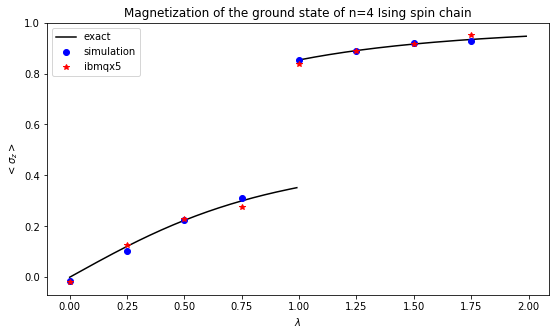

In [9]:


# As it is a system of only 4 particles, we can easily compute the exact result
def exact(lam):
    if lam <1:
        return lam/(2*np.sqrt(1+lam**2))
    if lam >1:
        return 1/2+lam/(2*np.sqrt(1+lam**2))
    return None
vexact = np.vectorize(exact)
l=np.arange(0.0,2.0,0.01)
l1=np.arange(0.0,2.0,0.25)
plt.figure(figsize=(9,5))
plt.plot(l,vexact(l),'k',label='exact')
plt.plot(l1, mag_sim, 'bo',label='simulation')
plt.plot(l1, mag, 'r*',label='ibmqx5')
plt.xlabel('$\lambda$')
plt.ylabel('$<\sigma_{z}>$')
plt.legend()
plt.title('Magnetization of the ground state of n=4 Ising spin chain')
plt.show()

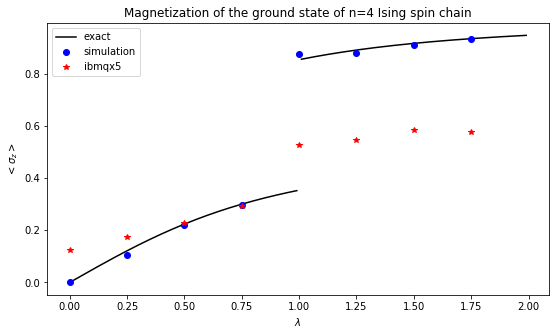

In [79]:
#This was the result when the real device is used:

The jump in the magnetization is due to the finite size effect. If we consider more and more spins, this jump decrease it until desappear in the limit $n\rightarrow \infty$.

## Time evolution

Schrödinger equation describes the time evolution of a quantum system:

$$ i\hbar\frac{d}{dt}|\Psi(t)\rangle=H(t)|\Psi(t)\rangle. $$

Then, the time evolution of a state if the hamiltonian is not time-dependent, _i.e._ $H\neq H(t)$, is

$$|\Psi(t)\rangle=U(t,t_{0})|\Psi(t_{0})\rangle \quad \mathrm{with} \quad U(t,t_{0})=e^{-i(t-t_{0})H}.$$ 

For simplicity, we will set $t_{0}=0$ and $|\Psi(t_{0})\rangle\equiv|\Psi_{0}\rangle$.

Using the stationary states basis (eigenstates of the hamiltonian),

$$ |\Psi(t)\rangle=\sum_{n}e^{-iE_{n}(t-t_{0})}|E_{n}\rangle\langle E_{n}|\Psi_{0}\rangle. $$

We can now check what is the time evolution of an operator

$$ \langle\Psi(t)|\mathcal{O}|\Psi(t)\rangle= \sum_{n}\sum_{m}e^{-it(E_{n}-E_{m})} \langle\Psi_{0}|E_{m}\rangle\langle E_{m}|\mathcal{O}|E_{n}\rangle\langle E_{n}|\Psi_{0}\rangle.$$

* If $|\Psi_{0})\rangle$ is an stationary state, then $\langle\Psi(t)|\mathcal{O}|\Psi(t)\rangle=\sum_{n}\langle E_{n}|\mathcal{O}|E_{n}\rangle$ and it is constant in time.
* If $[H,\mathcal{O}]=0$, then $\mathcal{O}$ has the same eigenstates as $H$ and $\langle\Psi(t)|\mathcal{O}|\Psi(t)\rangle=\langle \Psi_{0}|\mathcal{O}|\Psi_{0}\rangle$ and it is a constant of motion.

Then, if none of the above cases are fulfilled, the expectation value of $\mathcal{O}$ will oscillate according to the frequencies $(E_{n}-E_{m})$.

For the case of magnetization and the transverse Ising model, as $[H,\hat{\sigma}_{z}]\neq0$, we can observe a time evolution of an operator if we choose $|\Psi_{0}\rangle$ not being a stationary state.

### Time evolution operator

We can take advantage of our circuit to implement the time evolution in a very easy way: we only need to compute the time evolution operator over our diagonalized hamiltonian and then apply the $U_{dis}$ gate to transform it into the Ising state. As the eigenstates of $\tilde{H}$ are the states in the computational basis, the time evolution operation consists only to add the corresponding phase $e^{-itE_{n}}$ over the chosen state:

1) We choose some initial state written in terms of the $\tilde{H}$ basis $$ |\Psi_{0}\rangle = \sum_{i}c_{i}|\psi_{i}\rangle. $$ A linear combination of eigenstates is also an eigenstate, so $|\Psi_{0}\rangle$ is a stationary state of $\tilde{H}$.

2) We apply the time evolution operator over this state $$ |\Psi(t)\rangle=e^{-it\tilde{H}}|\Psi_{0}\rangle= \sum_{i}c_{i}e^{-it\epsilon_{i}}|\psi_{i}\rangle. $$

If we stop here and compute the magnetization, it will be constant, as we are evolving a stationary state... in terms of $\tilde{H}$ basis, but $|\Psi_{0}\rangle$ will not be necessarily an eigenstate of the Ising hamiltonian!

3) We implement the $U_{dis}$ gate to transform the state to the Ising basis $$ |\Phi(t)\rangle= U_{dis}|\Psi(t)\rangle= U_{dis}\sum_{i}c_{i}e^{-it\epsilon_{i}}|\psi_{i}\rangle. $$

Now, $|\Phi(t)\rangle$ is not, in general, an eigenstate of the Ising hamiltonian, so we expect to observe an oscillating time evolution of magnetization.

The key point here is that to implement the time evolution over a computational state is very easy, as we only need to add a phase over the qubits involve. Let's see a particular example.

### Example: time evolution of $|\uparrow\uparrow\uparrow\uparrow\rangle$ state

We want to observe the time evolution of the state of all spins align in the positive direction of $\sigma_{z}$. This is not an eigenstate of Ising hamiltonian, since "all spins aligned" is a degenerate state (all spins up or all spins down). First we need to know what is the corresponding state in the diagonal basis (remember that we choose $|\uparrow\rangle\equiv|0\rangle$):

$$ |\psi_{0}\rangle=U^{\dagger}_{dis}|0000\rangle=\cos\phi|0000\rangle+i\sin\phi|1100\rangle , \qquad \phi=\frac{1}{2}\arccos\left(\frac{\lambda}{\sqrt{1+\lambda^2}}\right).$$

Secondly, we compute the time evolution of this state, _i.e._ we add the corresponding phases $e^{-it\epsilon_{i}}$, where $\epsilon_{i}$ are the energies of the states $|0000\rangle$ and $|1100\rangle$:

$$ |\psi(t)\rangle=e^{-it(-2(\lambda+\sqrt{1+\lambda^2}))}\cos\phi|0000\rangle+ie^{-it2(\lambda-\sqrt{1+\lambda^2})}\sin\phi|1100\rangle = e^{2it(\lambda+\sqrt{1+\lambda^2}))}\left(\cos\phi|00\rangle+ ie^{4it\sqrt{1+\lambda^2}}\sin\phi|11\rangle\right)\otimes|00\rangle,$$

where we can forget the first exponential since it only introduces a phase.

Notice that to prepare this state is only necessary to make a rotation on the first qubit followed by a CNOT; the other two qubits are prepared in the $|0\rangle$ state, which is very convenient.
Once we have $|\psi(t)\rangle$, we can apply $U_{dis}$ and compute the expected value of the magnetization.

In [11]:
def Initial_time(qc,t,lam,q0,q1,q2,q3):
    qc.u3(np.arccos(lam/np.sqrt(1+lam**2)),pi/2.+4*t*np.sqrt(1+lam**2),0.,q0)
    qc.cx(q0,q1)
def Ising_time(qc,ini,udis,mes,lam,t,q0,q1,q2,q3,c0,c1,c2,c3):
    Initial_time(ini,t,lam,q0,q1,q2,q3)
    Udisg(udis,lam,q0,q1,q2,q3)
    mes.measure(q0,c0)
    mes.measure(q1,c1)
    mes.measure(q2,c2)
    mes.measure(q3,c3)
    qc.add_circuit("Ising_time",ini+udis+mes)

In [14]:
#Simulation
shots = 1024
backend = 'ibmqx_qasm_simulator'
coupling_map = None
# We compute the time evolution for lambda=0.5,0.9 and 1.8
nlam=3
magt_sim=[[] for _ in range(nlam)]
lam0=[0.5,0.9,1.8]
for j in range(nlam):
    lam=lam0[j]
    for i in range(9):
        Isex_time = QuantumProgram()
        q = Isex_time.create_quantum_register("q",4)
        c = Isex_time.create_classical_register("c", 4)
        Udis = Isex_time.create_circuit("Udis", [q], [c])
        ini = Isex_time.create_circuit("ini",[q],[c])
        mes = Isex_time.create_circuit("mes",[q],[c])

        t=i*0.25
        Ising_time(Isex_time,ini,Udis,mes,lam,t,q[0],q[1],q[2],q[3],c[0],c[1],c[2],c[3])

        Isex_time.set_api(Qconfig.APItoken, Qconfig.config["url"]) 

        result = Isex_time.execute(["Ising_time"], backend=backend,
                    coupling_map=coupling_map, shots=shots,timeout=240000)
        res=result.get_counts("Ising_time")
        r1=list(res.keys())
        r2=list(res.values())
        M=0
        for k in range(0,len(r1)):
            M=M+(4-2*digit_sum(r1[k]))*r2[k]/shots
        magt_sim[j].append(M/4)

In [18]:
shots = 1024
backend = 'ibmqx5'
max_credits = 5
# We compute the time evolution for lambda=0.5,0.9 and 1.8
nlam=3
magt=[[] for _ in range(nlam)]
lam0=[0.5,0.9,1.8]
for j in range(nlam):
    lam=lam0[j]
    for i in range(9):
        Isex_time = QuantumProgram()
        q = Isex_time.create_quantum_register("q",12)
        c = Isex_time.create_classical_register("c", 4)
        Udis = Isex_time.create_circuit("Udis", [q], [c])
        ini = Isex_time.create_circuit("ini",[q],[c])
        mes = Isex_time.create_circuit("mes",[q],[c])

        t=i*0.25
        Ising_time(Isex_time,ini,Udis,mes,lam,t,q[6],q[7],q[11],q[10],c[0],c[1],c[2],c[3])

        Isex_time.set_api(Qconfig.APItoken, Qconfig.config["url"]) 

        result = Isex_time.execute(["Ising_time"], backend=backend,
                    max_credits=max_credits, wait=10, shots=shots,timeout=240000)
        res=result.get_counts("Ising_time")
        r1=list(res.keys())
        r2=list(res.values())
        M=0
        for k in range(0,len(r1)):
            M=M+(4-2*digit_sum(r1[k]))*r2[k]/shots
        magt[j].append(M/4)

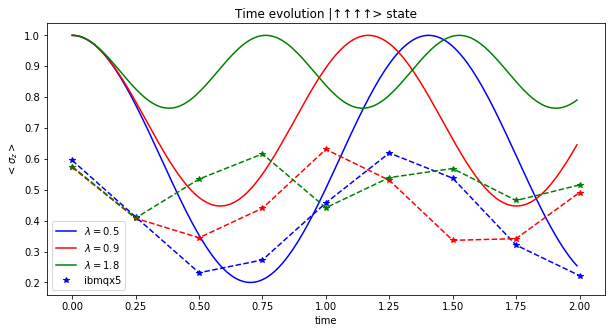

In [76]:
def exact_time(lam,tt):
    Mt=(1 + 2*lam**2 + np.cos(4*tt*np.sqrt(1 + lam**2)))/(2 + 2*lam**2)
    return Mt
vexact_t = np.vectorize(exact_time)
t=np.arange(0.0,2.0,0.01)
tt=np.arange(0.0,2.25,0.25)
plt.figure(figsize=(10,5))
plt.plot(t,vexact_t(0.5,t),'b',label='$\lambda=0.5$')
plt.plot(t,vexact_t(0.9,t),'r',label='$\lambda=0.9$')
plt.plot(t,vexact_t(1.8,t),'g',label='$\lambda=1.8$')
#plt.plot(tt, magt_sim[0], 'bo',label='simulation')
#plt.plot(tt, magt_sim[1], 'ro')
#plt.plot(tt, magt_sim[2], 'go')
plt.plot(tt, magt[0], 'b*',label='ibmqx5')
plt.plot(tt, magt[1], 'r*')
plt.plot(tt, magt[2], 'g*')
plt.plot(tt, magt[0], 'b--')
plt.plot(tt, magt[1], 'r--')
plt.plot(tt, magt[2], 'g--')
plt.xlabel('time')
plt.ylabel('$<\sigma_{z}>$')
plt.legend()
plt.title('Time evolution |↑↑↑↑> state')
plt.show()

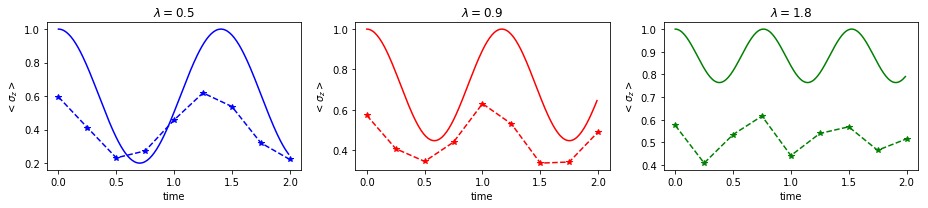

In [81]:
plt.figure(figsize=(13,3))
plt.subplot(1,3,1)
plt.plot(t,vexact_t(0.5,t),'b',label='$\lambda=0.5$')
plt.plot(tt, magt[0], 'b*',label='ibmqx5')
plt.plot(tt, magt[0], 'b--',label='ibmqx5')
plt.xlabel('time')
plt.ylabel('$<\sigma_{z}>$')
plt.title('$\lambda=0.5$')
plt.subplot(132)
plt.plot(t,vexact_t(0.9,t),'r',label='$\lambda=0.9$')
plt.plot(tt, magt[1], 'r*',label='ibmqx5')
plt.plot(tt, magt[1], 'r--',label='ibmqx5')
plt.xlabel('time')
plt.ylabel('$<\sigma_{z}>$')
plt.title('$\lambda=0.9$')
plt.subplot(133)
plt.plot(t,vexact_t(1.8,t),'g',label='$\lambda=1.8$')
plt.plot(tt, magt[2], 'g*',label='ibmqx5')
plt.plot(tt, magt[2], 'g--',label='ibmqx5')
plt.xlabel('time')
plt.ylabel('$<\sigma_{z}>$')
plt.title('$\lambda=1.8$')
plt.tight_layout()
plt.show()

***
### *References*

[1] R. Orús, *A Practical Introduction to Tensor Networks: Matrix Product States and Projected Entangled Pair States*, Annals of Physics **349**, 117-158 (2014), [arXiv:1306.2164](https://arxiv.org/abs/1306.2164).<br>
[2] F. Verstraete, J. I. Cirac and J. I. Latorre, *Quantum circuits for strongly correlated quantum systems*, Phys. Rev. A **79**, 032316 (2009), [arXiv:0804.1888](https://arxiv.org/abs/0804.1888). <br>
[3] J. I. Latorre and A. Riera, *A short review on entanglement in quantum spin systems*, J. Phys. A: Math. Theor. **42**, 504002 (2009), [arXiv:0906.1499](https://arxiv.org/abs/0906.1499). <br>
[4] E. Lieb, T. Schultz and D. Mattis, *Two soluble models of an antiferromagnetic chain*, [Annals of Physics **16**, Issue 3, 407-466 (1961)](https://www.sciencedirect.com/science/article/pii/0003491661901154). <br>
[5] S. Katsura, *Statistical Mechanics of the Anisotropic Linear Heisenberg Model*, [Phys. Rev. **127**, 1508 (1962)](https://journals.aps.org/pr/abstract/10.1103/PhysRev.127.1508). <br>
[6] A. J. Ferris, *Fourier transform of fermionic systems and the spectral tensor network*, Phys. Rev. Lett. **113**, 010401 (2014), [arXiv:1310.7605](https://arxiv.org/abs/1310.7605). <br>
[7] A. Barenco, C. H. Bennett, R. Cleve, D. P. DiVincenzo, N. Margolus, P. Shor, T. Sleator, J. Smolin, H. Weinfurter, *Elementary gates for quantum computation*, Phys.Rev. A **52**, 3457 (1995), [arXiv:950316](https://arxiv.org/abs/quant-ph/9503016).